In [1]:
#For classification:-

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import roc_auc_score,recall_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_predict

#from mlxtend.classifier import StackingClassifier

from sklearn.externals import joblib

#For Regression:-

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# 1-Classification -->Target='fraud_reported'

In [2]:
df=pd.read_csv('Automobile_insurance_fraud.csv')
pd.set_option('display.max_columns',None)

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.shape

(1000, 40)

# Feature Engineering

In [5]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [6]:
#There are negative values in capital-loss feauture.

In [7]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

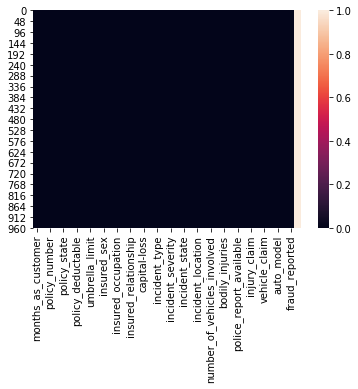

In [8]:
sns.heatmap(df.isnull())  

In [9]:
df.isnull().sum()#there are no missing values in  the dataset
#but actually there as missing values in the form of '?' which are not detected by the system as missing values.

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

# Relplacing '?' by NAN

In [10]:
df=df.replace('?',np.nan)
df.isnull().sum()#now we can see the missing values

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [11]:
#dropping the column which has all the values missing in the dataset.
df=df.drop('_c39',axis=1)

# Imputing the missing value

In [12]:
df['collision_type']=df['collision_type'].fillna(df['collision_type'].mode()[0])
df['property_damage']=df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available']=df['police_report_available'].fillna(df['police_report_available'].mode()[0])


In [13]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

# EDA

# Univariate analysis

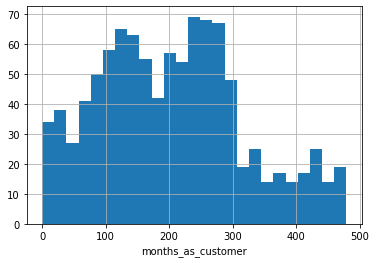

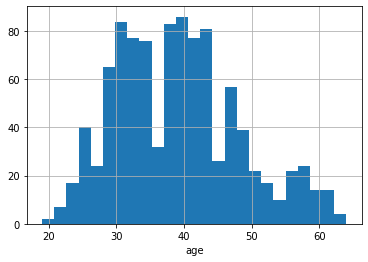

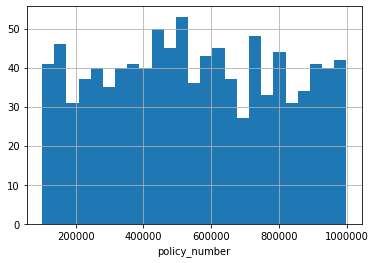

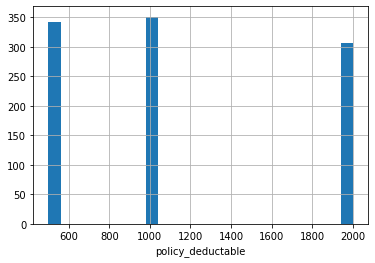

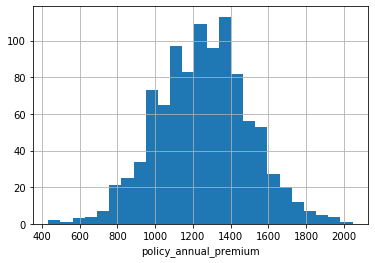

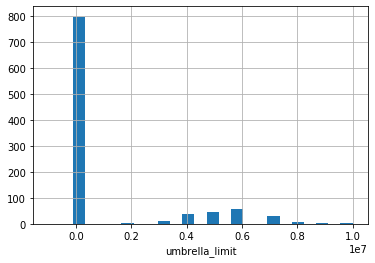

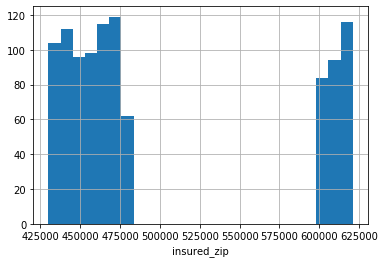

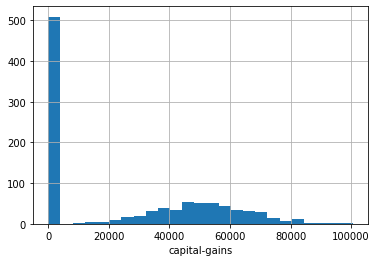

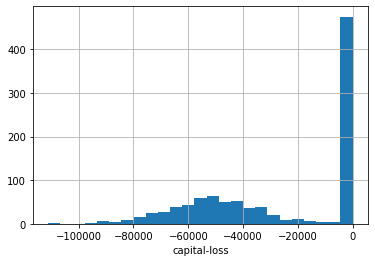

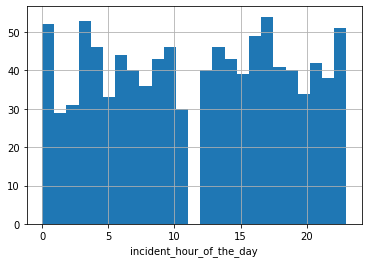

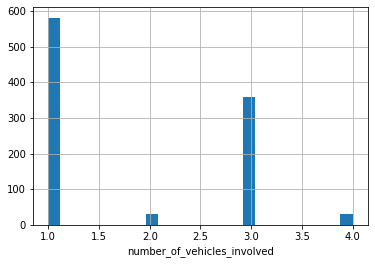

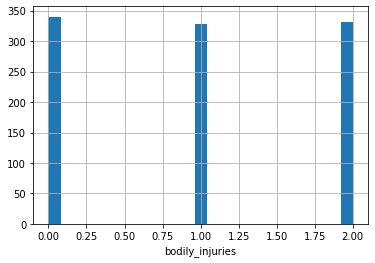

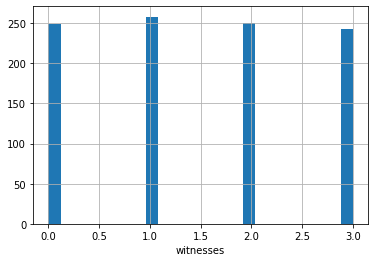

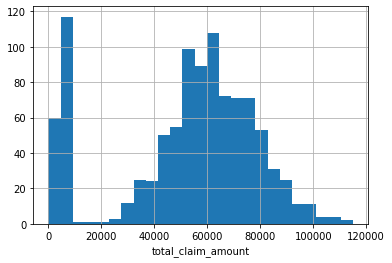

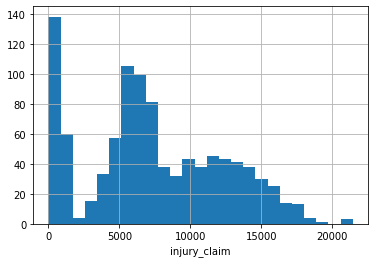

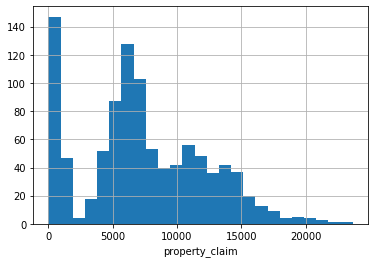

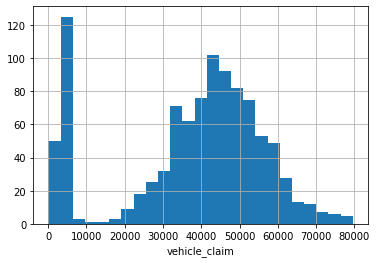

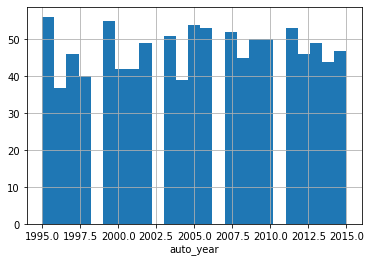

In [14]:
#checking for skewness
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.show()

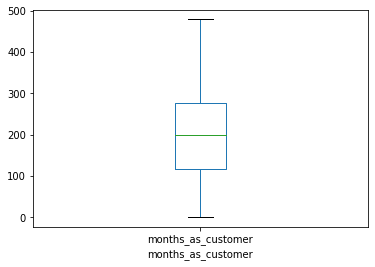

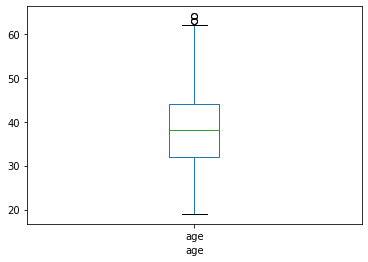

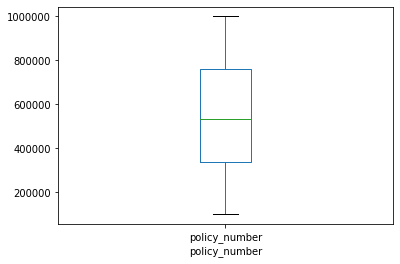

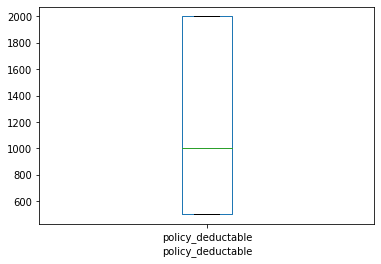

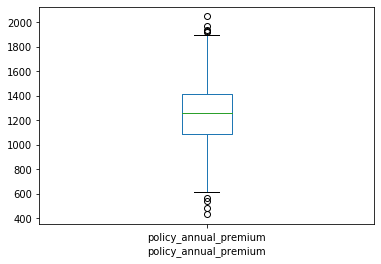

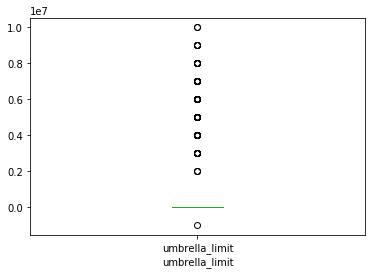

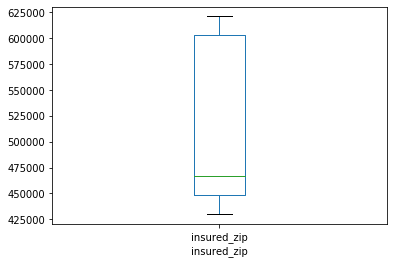

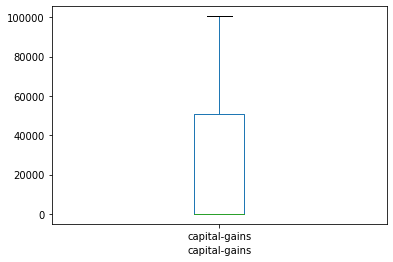

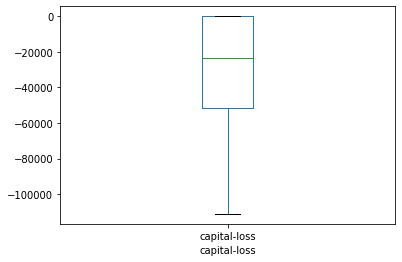

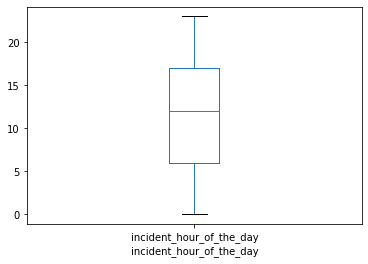

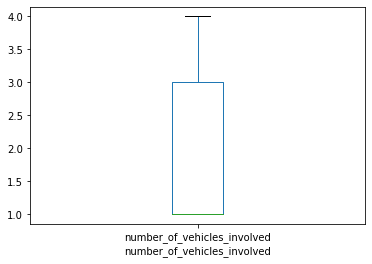

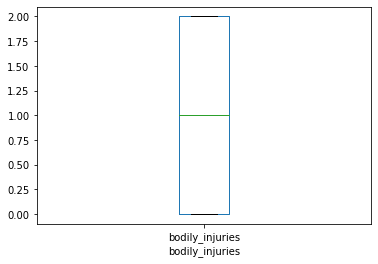

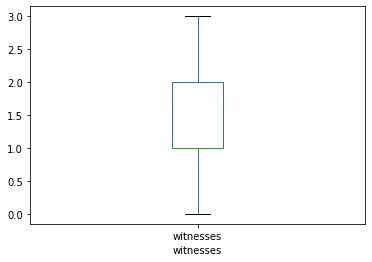

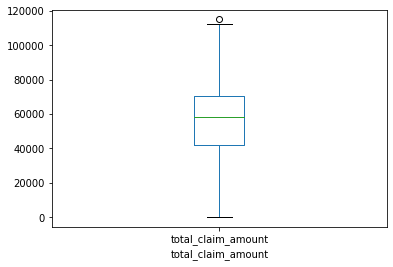

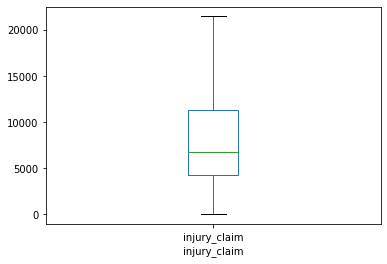

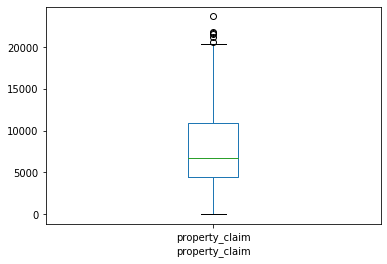

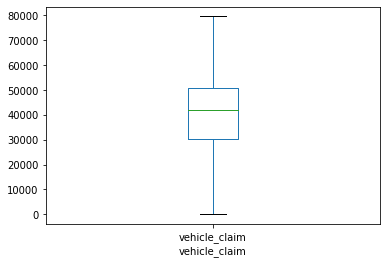

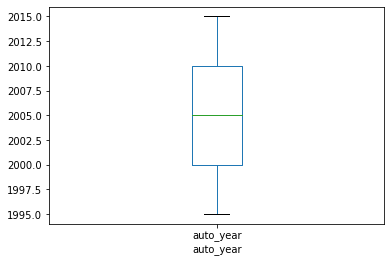

In [15]:
#checking for outliers

numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].plot.box()
    plt.xlabel(feature)
    plt.show()

# Feature Engineering part-2

In [16]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='object']
for feature in categorical_features:
    if df[feature].nunique()>=2:
        print(feature,df[feature].nunique())

policy_bind_date 951
policy_state 3
policy_csl 3
insured_sex 2
insured_education_level 7
insured_occupation 14
insured_hobbies 20
insured_relationship 6
incident_date 60
incident_type 4
collision_type 3
incident_severity 4
authorities_contacted 5
incident_state 7
incident_city 7
incident_location 1000
property_damage 2
police_report_available 2
auto_make 14
auto_model 39
fraud_reported 2


# converting columns to date format

In [17]:
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'], format='%d-%m-%Y')
df['incident_date']=pd.to_datetime(df['incident_date'], format='%d-%m-%Y')

# Creating a new feature 'days'

In [18]:
df['days']=(df['incident_date']-df['policy_bind_date']).dt.days

In [19]:
df['days'].head()

0     100
1    3130
2    5282
3    8996
4     256
Name: days, dtype: int64

# Dropping date columns as we extracted the required data from them

In [20]:
df=df.drop(['policy_bind_date','incident_date'],axis=1)

# Dropping incident_location columns as this is not required for model building

In [21]:
df=df.drop(['incident_location'],axis=1)

# Replacing target column with numerical values

In [22]:
df['fraud_reported']=df['fraud_reported'].replace(['Y','N'],[1,0])

In [23]:
df.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,days
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292,0.020544,0.047927
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354,0.012143,0.036742
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183,-0.029443,0.040100
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105,0.014817,0.050396
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226,-0.014480,-0.001208
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893,0.058622,-0.046179
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736,0.019368,0.000109
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398,-0.019173,-0.042226
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615,-0.014863,0.027647
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368,0.004316,-0.035873


In [24]:
#dropping features capital-gains,capital-loss as they are negatively correlated to the target.

# Coverting to dummies

In [25]:
df=pd.get_dummies(df)

In [26]:
df.head()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported,days,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,insured_sex_FEMALE,insured_sex_MALE,insured_education_level_Associate,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_adm-clerical,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving,insured_hobbies_base-jumping,insured_hobbies_basketball,insured_hobbies_board-games,insured_hobbies_bungie-jumping,insured_hobbies_camping,insured_hobbies_chess,insured_hobbies_cross-fit,insured_hobbies_dancing,insured_hobbies_exercise,insured_hobbies_golf,insured_hobbies_hiking,insured_hobbies_kayaking,insured_hobbies_movies,insured_hobbies_paintball,insured_hobbies_polo,insured_hobbies_reading,insured_hobbies_skydiving,insured_hobbies_sleeping,insured_hobbies_video-games,insured_hobbies_yachting,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife,incident_type_Multi-vehicle Collision,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,collision_type_Front Collision,collision_type_Rear Collision,collision_type_Side Collision,incident_severity_Major Damage,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Ambulance,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,incident_state_NC,incident_state_NY,incident_state_OH,incident_state_PA,incident_state_SC,incident_state_VA,incident_state_WV,incident_city_Arlington,incident_city_Columbus,incident_city_Hillsdale,incident_city_Northbend,incident_city_Northbrook,incident_city_Riverwood,incident_city_Springfield,property_damage_NO,property_damage_YES,police_report_available_NO,police_report_available_YES,auto_make_Accura,auto_make_Audi,auto_make_BMW,auto_make_Chevrolet,auto_make_Dodge,auto_make_Ford,auto_make_Honda,auto_make_Jeep,auto_make_Mercedes,auto_make_Nissan,auto_make_Saab,auto_make_Suburu,auto_make_Toyota,auto_make_Volkswagen,auto_model_3 Series,auto_model_92x,auto_model_93,auto_model_95,auto_model_A3,auto_model_A5,auto_model_Accord,auto_model_C300,auto_model_CRV,auto_model_Camry,auto_model_Civic,auto_model_Corolla,auto_model_E400,auto_model_Escape,auto_model_F150,auto_model_Forrestor,auto_model_Fusion,auto_model_Grand Cherokee,auto_model_Highlander,auto_model_Impreza,auto_model_Jetta,auto_model_Legacy,auto_model_M5,auto_model_MDX,auto_model_ML350,auto_model_Malibu,auto_model_Maxima,auto_model_Neon,auto_model_Passat,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,328,48,521585,1000,1406.91,0,466132,53300,0,5,1,1,2,71610,6510,13020,52080,2004,1,100,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,228,42,342868,2000,1197

In [27]:
df.shape

(1000, 162)

# Separating target and independent variables

In [28]:
y=df['fraud_reported']
X=df.drop(['fraud_reported','policy_number','capital-gains','capital-loss'],axis=1)

In [29]:
X.shape

(1000, 158)

# PCA

In [30]:
from sklearn.decomposition import PCA
pca=PCA(n_components=50)
df_pca50=pca.fit_transform(X)
df=pd.DataFrame(df_pca50)

# Skewness treatment

In [31]:
df.skew()

0     1.806714
1     0.815303
2    -0.613837
3     0.076112
4    -0.064939
5     0.057916
6     0.463077
7     0.004703
8     0.353689
9    -0.078997
10    0.021951
11    1.269501
12    0.232131
13    0.015826
14    0.008989
15    0.150893
16    0.461395
17    0.523643
18   -0.013764
19   -0.003543
20   -0.001638
21    0.094816
22   -0.071421
23    0.065398
24    0.185673
25    0.175490
26    0.040392
27   -0.004964
28    0.199186
29   -0.103989
30   -0.182783
31    0.299341
32   -0.059294
33    0.350381
34    0.457588
35   -0.049853
36    0.249490
37    0.598944
38    0.217990
39    0.110209
40    0.189270
41   -0.027280
42    0.273865
43    0.222467
44    0.135319
45    0.191992
46    0.271400
47    0.177049
48   -0.061981
49    0.296871
dtype: float64

# Applying Power transformation to remove skewness

In [32]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson') 
df=pt.fit_transform(df)
df=pd.DataFrame(df)

In [33]:
df.skew()

0     1.482007
1     0.431059
2     0.080426
3    -0.176454
4    -0.038522
5     0.037959
6    -0.022375
7    -0.010915
8     0.122777
9    -0.019922
10    0.002273
11    0.127402
12    0.068799
13    0.000423
14    0.004339
15    0.077764
16    0.026770
17    0.062300
18    0.003883
19   -0.007554
20   -0.000932
21    0.003762
22    0.003256
23    0.003069
24    0.001829
25   -0.008354
26    0.003547
27    0.001245
28    0.007695
29    0.009385
30    0.015611
31    0.020516
32    0.007027
33   -0.000495
34    0.002386
35   -0.001919
36   -0.000028
37    0.012680
38   -0.004723
39    0.001152
40    0.007743
41    0.000149
42    0.007815
43    0.002376
44   -0.006020
45   -0.006987
46    0.002979
47   -0.000009
48    0.005514
49   -0.016605
dtype: float64

In [34]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,-0.496901,-0.257176,0.684257,0.310809,-1.427071,1.752489,0.163463,-0.599390,1.164000,-1.282721,-0.003526,0.170258,-0.978925,0.179320,-0.025136,1.352620,1.152547,1.378003,0.632671,-1.038201,-1.677070,-1.276506,-0.120316,-0.246529,0.842117,1.181645,0.945992,0.354383,-1.174238,0.471759,0.340740,0.722108,1.152245,-2.454805,-0.411427,-1.131639,-1.347063,0.014372,-0.489740,-0.749157,-0.924287,-0.758364,-0.749761,1.285182,-1.050673,-1.259195,-1.314484,-1.823994,-0.417738,0.421651
1,1.943596,-0.238548,-1.536288,-0.167933,0.011586,0.525734,1.281330,0.188650,0.359089,-0.219559,-0.174832,0.565417,-0.034321,-1.511839,-1.219997,1.161423,0.163069,-0.257940,0.832464,0.189504,1.264046,0.439537,-1.055957,0.404377,-0.014509,1.174714,0.610172,0.467249,-0.833351,0.033905,0.245502,-0.392259,0.372527,1.331798,0.160436,-0.111489,0.474836,-1.634537,0.049809,-1.341349,0.423785,-0.486665,-1.376868,0.883636,-2.977135,-0.197321,1.239365,-1.901163,-1.746007,-0.478297
2,1.943592,-1.455800,-0.774851,-0.657633,0.822289,-0.287423,1.235879,-0.734973,-0.644179,-0.514041,-0.287466,-1.696526,1.117713,1.473211,1.273564,-1.260408,-0.164554,0.047991,0.210818,-0.962791,1.034284,1.221403,1.436045,-0.345410,-1.203183,0.215981,0.845072,-0.376879,-0.731908,0.125705,0.230380,0.833484,-2.297456,-1.038817,0.104703,-0.811182,-1.236395,-0.589875,-2.592163,0.399322,-0.958972,-1.124717,0.938927,-0.911450,0.453447,0.171137,-1.152210,0.615802,-2.551720,1.534780
3,2.035204,1.393972,0.599498,1.480450,0.154213,-1.696955,1.277469,-0.513909,0.303175,-0.948539,-1.767150,-0.225757,-1.131934,0.325391,0.043303,-0.614589,-0.460443,-0.680958,0.926525,1.046340,0.023207,-2.203204,0.380943,-0.464059,0.268894,-0.051418,1.032504,1.129838,-0.867604,-0.617876,0.770168,-0.047035,0.303246,-0.741890,-0.052455,0.191664,1.548935,1.072771,-0.211435,2.796065,0.818027,-1.229699,0.155643,0.218116,1.209550,0.474669,-0.097232,-0.399349,-1.520692,-0.224085
4,2.035208,1.417729,-1.424906,-0.085272,0.204250,1.565347,0.185666,-1.341169,0.384833,1.679450,-0.427814,0.848703,-0.245131,-0.613412,-1.292801,0.701880,-0.628231,-0.836895,0.442086,1.333051,-0.409653,1.470100,0.958582,-0.071747,0.323918,-1.086384,0.389845,-1.247411,0.501107,-0.060191,0.043179,-0.065263,0.133256,-0.324122,0.170681,0.276636,2.465711,0.595923,-0.999214,0.599678,-0.098907,-1.129806,1.390380,1.072548,0.216172,-0.540734,0.270608,0.427599,1.410391,0.141346


# Scaling the data

In [35]:
#Applying Standard scalar to independent variable only
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(df)

# Model building

In [36]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,stratify=y)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [38]:
knn=KNeighborsClassifier()
svc=SVC()
lr=LogisticRegression()
dt=DecisionTreeClassifier()
gnb=GaussianNB()
rfc=RandomForestClassifier()
xgb=XGBClassifier()
gbc=GradientBoostingClassifier()
ada=AdaBoostClassifier()

In [39]:
models=[]
models.append(('KNeighborsClassifier',knn))
models.append(('SVC',svc))
models.append(('LogisticRegression',lr))
models.append(('DecisionTreeClassifier',dt))
models.append(('GaussianNB',gnb))
models.append(('RandomForestClassifier',rfc))
models.append(('XGBClassifier',xgb))
models.append(('GradientBoostingClassifier',gbc))
models.append(('AdaBoostClassifier',ada))

In [40]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

***************** KNeighborsClassifier *******************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score  - 0.74


cross_val_score  - 0.7521256125612561


roc_auc_score  - 0.5622855181880577


Recall_score  - 0.20967741935483872


classification report
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       188
           1       0.45      0.21      0.29        62

    accuracy                           0.74       250
   macro avg       0.61      0.56      0.56       250
weighted avg       0.70      0.74      0.70       250



[[172  16]
 [ 49  13]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



***************** SVC *******************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf

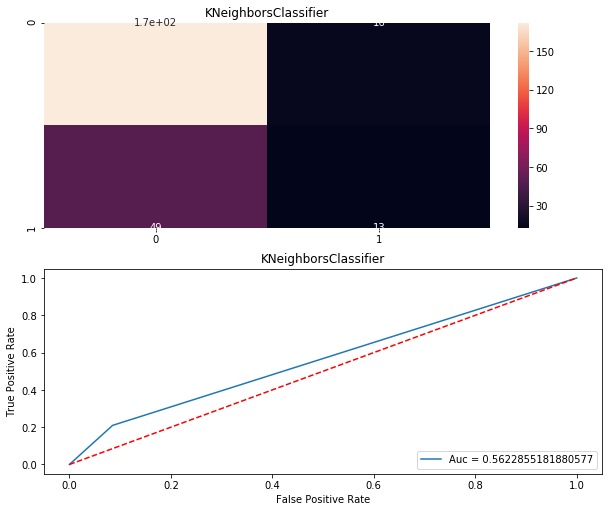

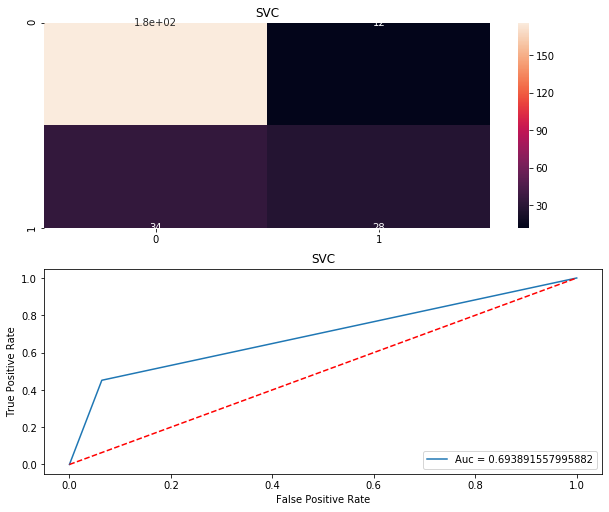

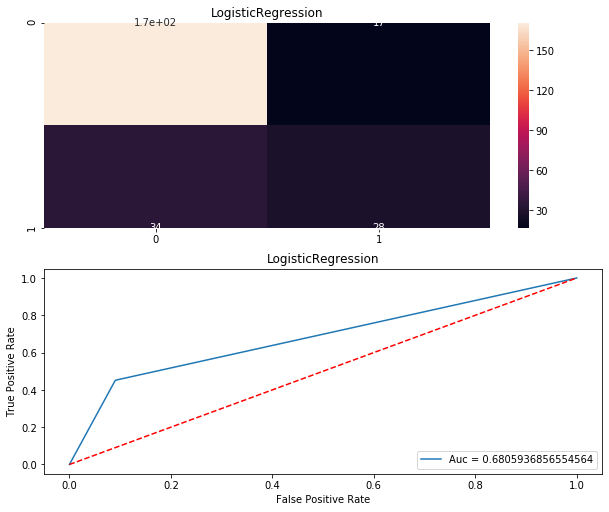

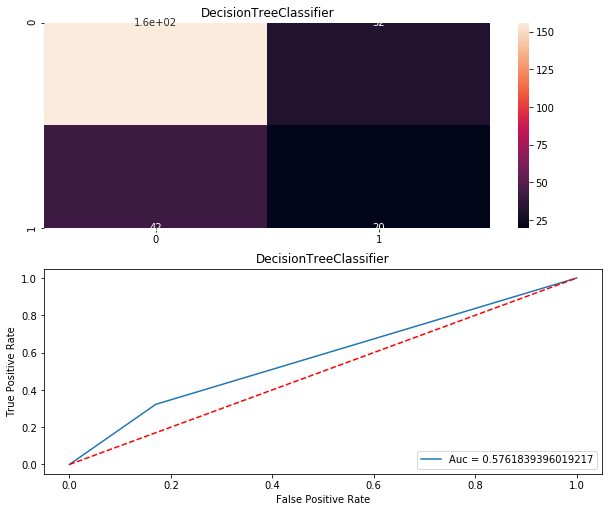

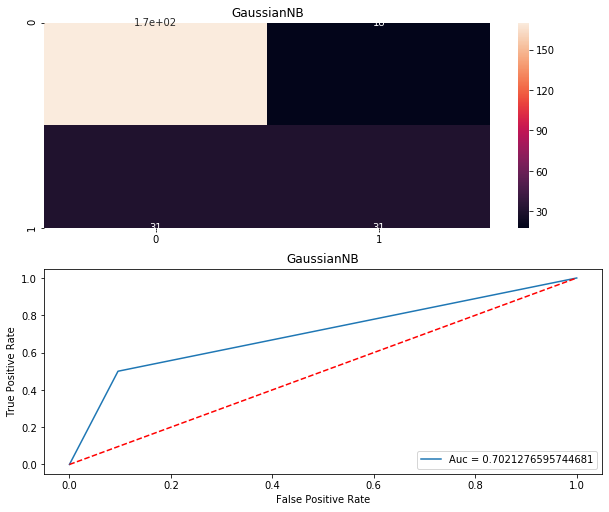

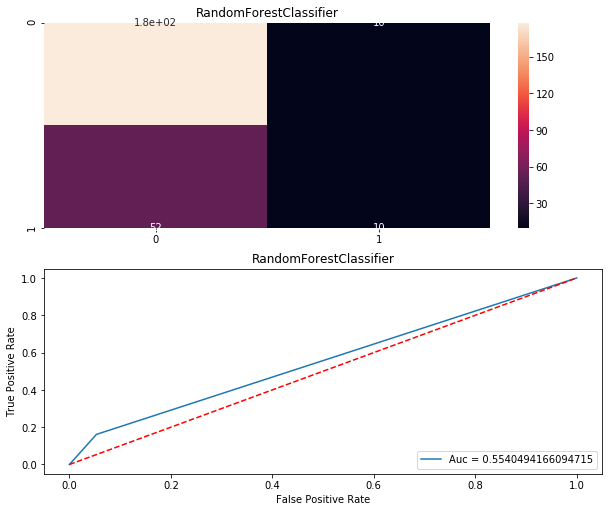

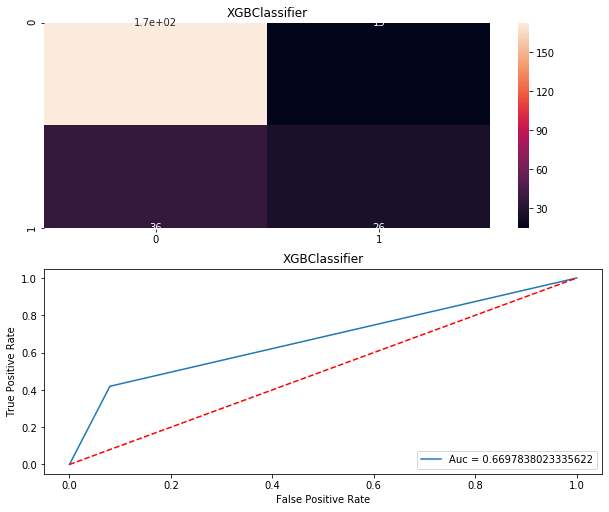

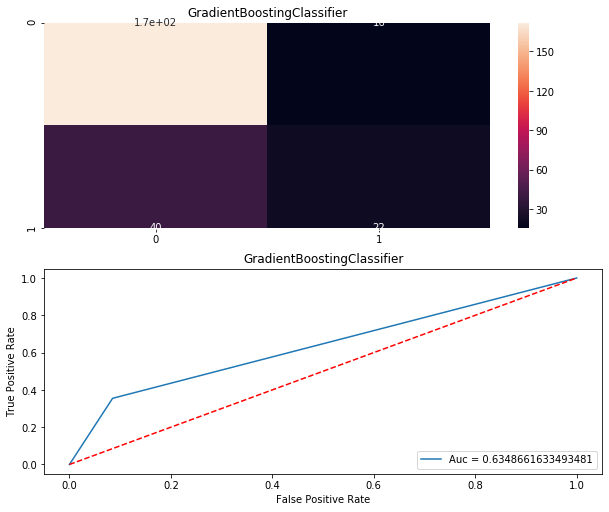

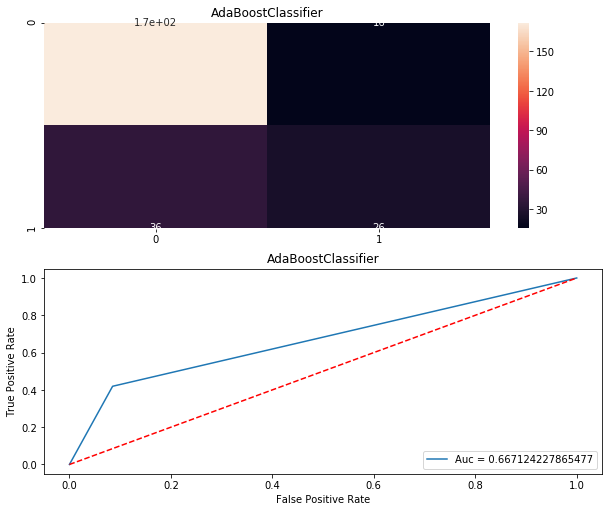

In [41]:
Model=[]
score=[]
cv=[]
rocscore=[]
recall=[]
for name,model in models:
    print('*****************',name,'*******************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score  -',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('cross_val_score  -',sc)
    cv.append(sc*100)
    print('\n')
    fpr,tpr,threshold=roc_curve(y_test,pre)
    roc_auc=auc(fpr,tpr)
    print('roc_auc_score  -',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    
    re=recall_score(y_test,pre)
    print('Recall_score  -',re)
    recall.append(re*100)
    print('\n')
    
    print('classification report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(fpr,tpr,label='Auc = ' +str(roc_auc))
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')
    
    
    
    

In [42]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':score,'Cross_val_score':cv})
result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,74.0,75.212561
1,SVC,81.6,79.309871
2,LogisticRegression,79.6,79.908981
3,DecisionTreeClassifier,70.4,70.684278
4,GaussianNB,80.4,79.611911
5,RandomForestClassifier,75.2,75.498660
6,XGBClassifier,79.6,77.299750
7,GradientBoostingClassifier,77.6,77.100700
8,AdaBoostClassifier,79.2,74.912581


In [ ]:
#hence SVC is the best performing Algorithm .But Gaussiannb has highest CVS.

In [ ]:
#But our target score is 90%
#Hence we will apply Gridsearchcv to the top3 performing model and try to reach 90% score.

In [ ]:
#First lets calculate the random state of the models at which they perform the best.
#Then we will select the top4 models and do gridsearchcv on them to attain our target score of 90%.

# Finding the best random_state for all models

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,recall_score
from sklearn.linear_model import LogisticRegression
def maxaccuracy_score(model,x,y):
    max_accuracy=0
    for r_state in range(42,101):
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,stratify=y)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        score=accuracy_score(y_test,pred)
        
        if score>max_accuracy:
            max_accuracy=score
            final_r_state=r_state
    print('max_accuracy_score is at random_state  ',final_r_state,'  which is  ',max_accuracy)
    return final_r_state

In [44]:
print('knn',maxaccuracy_score(knn,x,y))
print('svc',maxaccuracy_score(svc,x,y))
print('lr',maxaccuracy_score(lr,x,y))
print('dt',maxaccuracy_score(dt,x,y))
print('gnb',maxaccuracy_score(gnb,x,y))
print('rfc',maxaccuracy_score(rfc,x,y))
print('xgb',maxaccuracy_score(xgb,x,y))
print('gbc',maxaccuracy_score(gbc,x,y))
print('ada',maxaccuracy_score(ada,x,y))

max_accuracy_score is at random_state   63   which is   0.784
knn 63
max_accuracy_score is at random_state   63   which is   0.824
svc 63
max_accuracy_score is at random_state   53   which is   0.848
lr 53
max_accuracy_score is at random_state   81   which is   0.744
dt 81
max_accuracy_score is at random_state   89   which is   0.852
gnb 89
max_accuracy_score is at random_state   45   which is   0.808
rfc 45
max_accuracy_score is at random_state   71   which is   0.824
xgb 71
max_accuracy_score is at random_state   71   which is   0.812
gbc 71
max_accuracy_score is at random_state   81   which is   0.816
ada 81


# GridSearchCV

# model1->GaussianNB(random_state=89)=85.2%

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=89,stratify=y)
gnb=GaussianNB()

In [44]:
parameters={'var_smoothing': np.logspace(0,-9, num=100)}
grid_search=GridSearchCV(gnb,parameters,scoring='r2',n_jobs=-1,cv=10)
grid_search=grid_search.fit(x,y)
grid_search.best_params_ 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'var_smoothing': 0.23101297000831597}

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=89)
gnb=GaussianNB(var_smoothing= 0.23101297000831597)
gnb.fit(x,y)
pred_gnb=gnb.predict(x_test)
score=r2_score(y_test,pred_gnb)
print('Accuracy=  ',accuracy_score(y_test,pred_gnb))

Accuracy=   0.828


In [47]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
gnb=GaussianNB(var_smoothing=0.23101297000831597)
cvs=cross_val_score(gnb,x,y,scoring='accuracy',cv=10)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(gnb,x,y,cv=5)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.800089208920892


array([[689, 144],
       [ 64, 103]], dtype=int64)

# model2->XGBClassifier(random_state=71)=82.4%

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=71)
xgb=XGBClassifier()

In [49]:
from sklearn.model_selection import GridSearchCV
parameters=[{'learning_rate':[0.1,0.2,0.3,0.4],'max_depth':[3,4,5,6,7,8],'colsample_bytree':[0.5,0.6,0.7,0.8,0.9]}]
            
gscv=GridSearchCV(xgb,parameters,scoring='r2',n_jobs=-1,cv=10)
grid_search=gscv.fit(x,y)
grid_search.best_params_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3}

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=71)
xgb=XGBClassifier(colsample_bytree=0.8, learning_rate=0.1, max_depth=3)
xgb.fit(x,y)
pred=xgb.predict(x_test)
print('Accuracy=  ',accuracy_score(y_test,pred))

Accuracy=   0.948


In [51]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
xgb=XGBClassifier(colsample_bytree=0.8, learning_rate=0.1, max_depth=3)
cvs=cross_val_score(xgb,x,y,scoring='accuracy',cv=10)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(xgb,x,y,cv=5)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.798929192919292


array([[695, 151],
       [ 58,  96]], dtype=int64)

# model3->SVC(random_state=63)=82.4%

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=63)
svc=SVC()

In [53]:
from sklearn.model_selection import GridSearchCV
parameters=[{'C':[0.1,0.5,1,2,3],'kernel':['rbf','poly']}]
            
gscv=GridSearchCV(svc,parameters,scoring='accuracy',n_jobs=-1,cv=10)
grid_search=gscv.fit(x,y)
grid_search.best_params_

{'C': 1, 'kernel': 'rbf'}

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=63)
svc=SVC(kernel='rbf',C=1)
svc.fit(x,y)
pred=svc.predict(x_test)
print('Accuracy=  ',accuracy_score(y_test,pred))

Accuracy=   0.912


In [55]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
svc=SVC(kernel='rbf',C=1)
cvs=cross_val_score(svc,x,y,scoring='accuracy',cv=10)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(svc,x,y,cv=5)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.7930987098709871


array([[691, 143],
       [ 62, 104]], dtype=int64)

# model4->RandomForestClassifier(random_state=45)=80.8%

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45)
rfc=RandomForestClassifier()

In [57]:
parameters=[{'criterion':['gini','entropy'],'max_depth':[5,7,9,10],'min_samples_leaf':[1,2],'n_estimators':[100,250,500]}]
            
grid_search=GridSearchCV(rfc,parameters,scoring='accuracy',n_jobs=-1,cv=10)
grid_search=grid_search.fit(x,y)
grid_search.best_params_ 

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'n_estimators': 100}

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=45)
rfc=RandomForestClassifier(criterion='gini',min_samples_leaf=2,max_depth=10,n_estimators=100)
rfc.fit(x,y)
pred=rfc.predict(x_test)
print('Accuracy=  ',accuracy_score(y_test,pred))

Accuracy=   0.968


In [59]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
from sklearn.model_selection import cross_val_predict
rfc=RandomForestClassifier(criterion='gini',min_samples_leaf=2,max_depth=10,n_estimators=100)
cvs=cross_val_score(rfc,x,y,scoring='accuracy',cv=10)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(rfc,x,y,cv=5)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.7640167016701669


array([[738, 222],
       [ 15,  25]], dtype=int64)

# Saving the final GaussianNB model

In [61]:
#From all the model tried above GaussianNB model cross_val_score is best=80% ,
#corresponding random_state=89
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=89)
gnb=GaussianNB(var_smoothing= 0.23101297000831597)

In [62]:
gnb.fit(x,y)
pred_gnb=gnb.predict(x_test)
score=r2_score(y_test,pred_gnb)
print('Accuracy=  ',accuracy_score(y_test,pred_gnb))

Accuracy=   0.828


In [67]:
from sklearn.model_selection import cross_val_predict
gnb=GaussianNB(var_smoothing=0.23101297000831597)
gnb.fit(x,y)
cvs=cross_val_score(gnb,x,y,scoring='accuracy',cv=10)
print('cross_val_scores=  ',cvs.mean())
y_pred=cross_val_predict(gnb,x,y,cv=5)
conf_mat=confusion_matrix(y_pred,y)
conf_mat

cross_val_scores=   0.800089208920892


array([[689, 144],
       [ 64, 103]], dtype=int64)

In [68]:
from sklearn.externals import joblib
joblib.dump(gnb,'project11-autoinsurancefraud.obj')

['project11-autoinsurancefraud.obj']

In [69]:
model=joblib.load('project11-autoinsurancefraud.obj')

In [70]:
final_predictions=model.predict(x_test)
final_predictions=pd.DataFrame(final_predictions,columns=['fraud_reported'])
final_predictions.head()

,fraud_reported
0,0
1,0
2,0
3,0
4,0


In [71]:
final_predictions.sample(n=10)

,fraud_reported
57,0
173,0
204,1
44,0
153,1
151,0
177,0
55,1
196,0
116,0


# Saving final predictions in file.csv 

In [67]:
final_predictions.to_csv('E:\\final_predictionsautoinsurancefraud.csv',index=False)

# Conclusion:-

# 2-Regression -->target=Claim Amount

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.externals import joblib

In [73]:
df=pd.read_csv('auto_insurance_claims_amount.csv')
df.head()

,Customer,Country,State Code,State,Claim Amount,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Claim Reason,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [74]:
df.shape

(9134, 26)

In [75]:
df.isnull().sum()#no missing values in the dataset

Customer                         0
Country                          0
State Code                       0
State                            0
Claim Amount                     0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Claim Reason                     0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

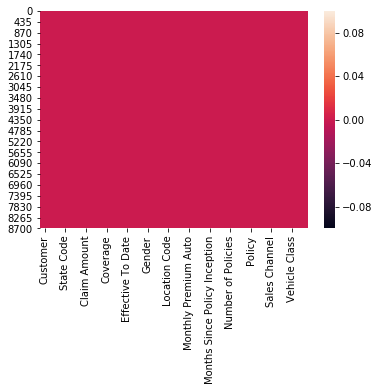

In [76]:
sns.heatmap(df.isnull())

In [77]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='object']
for feature in categorical_features:
    if df[feature].nunique()>=1:
        print(feature,df[feature].nunique())

Customer 9134
Country 1
State Code 5
State 5
Response 2
Coverage 3
Education 5
Effective To Date 59
EmploymentStatus 5
Gender 2
Location Code 3
Marital Status 3
Policy Type 3
Policy 9
Claim Reason 4
Sales Channel 4
Vehicle Class 6
Vehicle Size 3


In [78]:
df=df.drop(['Customer','Effective To Date'],axis=1)
#df=df.drop(['Customer','Country','State Code','State','Effective To Date'],axis=1)
#I tried this but the score decreases even more.

In [79]:
df.shape

(9134, 24)

In [80]:
df=pd.get_dummies(df)
df.shape

(9134, 71)

# Separating training and testing dataset

In [81]:
y=df['Claim Amount']
X=df.drop(['Claim Amount'],axis=1)

# PCA

In [82]:
from sklearn.decomposition import PCA
pca=PCA(n_components=35)
df_pca35=pca.fit_transform(X)
x=pd.DataFrame(df_pca35)

# Removing skewness

In [83]:
x.skew()

0     0.286877
1     1.786947
2     0.037928
3     1.427494
4     0.283683
5     1.251722
6     2.756790
7     0.169649
8    -0.036323
9     0.998115
10    0.873610
11    0.180832
12    0.418356
13    0.305940
14    0.686960
15    0.229242
16    0.117219
17    0.397642
18    0.097706
19    0.489036
20    0.167356
21    1.351324
22    0.542855
23    0.532066
24    0.515252
25    0.818909
26   -0.190625
27    1.364196
28    1.211671
29    0.000361
30    1.202415
31    1.325621
32    0.150444
33    0.307018
34    0.779091
dtype: float64

In [84]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson') 
x_power=pt.fit_transform(x)
x=pd.DataFrame(x_power,columns=x.columns)

In [85]:
x.skew()

0     0.089270
1     0.201513
2     0.016495
3     0.037365
4     0.061036
5     0.289481
6     1.034209
7     0.026857
8    -0.027235
9     0.207827
10    0.203187
11    0.016179
12    0.050382
13    0.028584
14    0.055412
15    0.016037
16    0.015621
17    0.037476
18    0.006575
19    0.111805
20    0.007394
21    0.042975
22    0.024694
23   -0.017033
24   -0.018449
25   -0.116504
26    0.031574
27   -0.031888
28   -0.043055
29    0.008312
30    0.008633
31   -0.072810
32   -0.014240
33    0.002334
34   -0.149518
dtype: float64

# Scaling the data

In [86]:
#Applying Standard scalar to independent variable only
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x=pd.DataFrame(data=x_scaled,columns=x.columns)


# Model Building

In [87]:
knn=KNeighborsRegressor()
svr=SVR()
lr=LinearRegression()
dt=DecisionTreeRegressor()
gbm=GradientBoostingRegressor()
ada=AdaBoostRegressor()
rfr=RandomForestRegressor()
xgb=XGBRegressor()

In [88]:
models=[]
models.append(('KNeighborsRegressor',knn))
models.append(('SVR',svr))
models.append(('LinearRegression',lr))
models.append(('DecisionTreeRegressor',dt))
models.append(('GradientBoostingRegressor',gbm))
models.append(('AdaBoostRegressor',ada))
models.append(('RandomForestRegressor',rfr))
models.append(('XGBRegressor',xgb))

In [89]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [113]:
Model=[]
r2score=[]
rmse=[]
cv=[]

for name,model in models:
    print('*****************',name,'*******************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    score=r2_score(y_test,pre)
    print('R2score  -',score)
    r2score.append(score*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='r2').mean()
    print('cross_val_score  -',sc)
    cv.append(sc*100)
    print('\n')
    rmsescore=np.sqrt(mean_squared_error(y_test,pre))
    print('rmse_score  -',rmsescore)
    rmse.append(rmsescore)
    print('\n')
    

***************** KNeighborsRegressor *******************


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


R2score  - 0.14094247062683662


cross_val_score  - 0.12399369940844689


rmse_score  - 656.8725724225332


***************** SVR *******************


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)


R2score  - -0.07153697704957063


cross_val_score  - -0.08164210838182358


rmse_score  - 733.6240924674095


***************** LinearRegression *******************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


R2score  - 0.17203890897584484


cross_val_score  - 0.1811434298233962


rmse_score  - 644.8741495248679


***************** DecisionTreeRegressor *******************


DecisionTreeRegress

In [114]:
result=pd.DataFrame({'Model':Model,'R2_score':r2score,'RMSEscore':rmse,'Cross_val_score':cv})
result

,Model,R2_score,RMSEscore,Cross_val_score
0,KNeighborsRegressor,14.094247,656.872572,12.399370
1,SVR,-7.153698,733.624092,-8.164211
2,LinearRegression,17.203891,644.874150,18.114343
3,DecisionTreeRegressor,48.457786,508.805198,44.522266
4,GradientBoostingRegressor,66.272185,411.589332,67.859064
5,AdaBoostRegressor,-27.943073,801.638178,-59.214727
6,RandomForestRegressor,68.817210,395.755983,68.988820
7,XGBRegressor,67.106259,406.468261,67.251163


In [ ]:
#hence RandomForestRegressor is the best performing Algorithm for the taken dataset.
#But our target score is 90%
#to achieve 90% score we will apply Gridsearchcv technique to the top3 performing models.

In [ ]:
#First lets calculate the random state of the models at which they perform the best.
#Then we will select the top3 models and do gridsearchcv on them to attain our target score of 90%.
#Then Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.

# Finding the best random_state for all models

In [117]:
def maxr2_score(model,x,y):
    max_r_score=0
    for r_state in range(42,101):
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        score=r2_score(y_test,pred)
        
        if score>max_r_score:
            max_r_score=score
            final_r_state=r_state
    print('max_r2_score is at random_state  ',final_r_state,'  which is  ',max_r_score)
    return final_r_state
    

In [118]:
print('knn',maxr2_score(knn,x,y))
#print('SVR',maxr2_score(svr,x,y))
print('lr',maxr2_score(lr,x,y))
print('dt',maxr2_score(dt,x,y))
print('gbm',maxr2_score(gbm,x,y))
print('rfr',maxr2_score(rfr,x,y))
print('xgb',maxr2_score(xgb,x,y))

#print('ada',maxr2_score(ada,x,y))

#For SVR and Adaboost model the value of max_r_score never increase above zero for any random_state range given in the loop.
#this doesnot satisfy the condition given in our loop.
#hence both model gives error when run for this loop
#so i am not considering SVR and Adaboost for model building.


#UnboundLocalError: local variable 'final_r_state' referenced before assignment

max_r2_score is at random_state   83   which is   0.18231509484908182
knn 83
max_r2_score is at random_state   87   which is   0.20635568626920942
lr 87
max_r2_score is at random_state   83   which is   0.5354020524530991
dt 83
max_r2_score is at random_state   87   which is   0.7044205810751782
gbm 87
max_r2_score is at random_state   93   which is   0.7270057956052584
rfr 93
max_r2_score is at random_state   97   which is   0.6966232818603362
xgb 97


# GridSearchCV

# model1->RandomForestRegressor(random_state=93)=72.7

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=93)
rfr=RandomForestRegressor()

In [91]:
parameters=[{'max_depth':[5,7,9,10],'min_samples_leaf':[1,2],'n_estimators':[100,250,500]}]
            
grid_search=GridSearchCV(rfr,parameters,scoring='r2',n_jobs=-1,cv=10)
grid_search=grid_search.fit(x,y)
grid_search.best_params_ 

{'max_depth': 10, 'min_samples_leaf': 2, 'n_estimators': 500}

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=93)
rfr=RandomForestRegressor(max_depth=10,min_samples_leaf=2,n_estimators=500)
rfr.fit(x,y)
pred_rfr=rfr.predict(x_test)
score=r2_score(y_test,pred_rfr)
print('R2_score=  ',score)
print('RMSE score= ',np.sqrt(mean_squared_error(y_test,pred_rfr)))

R2_score=   0.8556248348503306
RMSE score=  247.772980798744


In [94]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
rfr=RandomForestRegressor(max_depth=10,min_samples_leaf=2,n_estimators=500)
cvs=cross_val_score(rfr,x,y,scoring='r2',cv=10)
cvs.mean()

0.7023338117606617

# model2->GradientBoostingRegressor(random_state=87)=70.44

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=87)
gbm=GradientBoostingRegressor()

In [98]:
from sklearn.model_selection import GridSearchCV

parameters=[{'max_depth':[5,7,9,10],'min_samples_leaf':[1,2],
            'learning_rate':[0.1,0.05,0.001], 'n_estimators':[50,100]}]
            
grid_search=GridSearchCV(gbm,parameters,n_jobs=-1,cv=10)
grid_search=grid_search.fit(x,y)
grid_search.best_params_ 

{'learning_rate': 0.05,
 'max_depth': 9,
 'min_samples_leaf': 2,
 'n_estimators': 100}

In [99]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=87)
gbm=GradientBoostingRegressor(learning_rate=0.05,max_depth=9,min_samples_leaf=2,n_estimators=100)
gbm.fit(x,y)
pred_gbm=gbm.predict(x_test)
score=r2_score(y_test,pred_gbm)
print('R2_score=  ',score)
print('RMSE score= ',np.sqrt(mean_squared_error(y_test,pred_gbm)))

R2_score=   0.9595561587624521
RMSE score=  132.00227832724084


In [100]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
gbm=GradientBoostingRegressor(learning_rate=0.1,max_depth=5,min_samples_leaf=2,n_estimators=50)
cvs=cross_val_score(gbm,x,y,scoring='r2',cv=10)
cvs.mean()

0.6853622407144558

# model3->XGBoost(random_state=97)=69.66

In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=97)
xgb=XGBRegressor()

In [102]:
from sklearn.model_selection import GridSearchCV
parameters=[{'learning_rate':[0.1,0.2,0.3,0.4],'max_depth':[3,4,5,6,7,8],'colsample_bytree':[0.5,0.6,0.7,0.8,0.9]}]
            
gscv=GridSearchCV(xgb,parameters,scoring='r2',n_jobs=-1,cv=10)
grid_search=gscv.fit(x,y)
grid_search.best_params_

{'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 7}

In [103]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=97)
xgb=XGBRegressor(colsample_bytree=0.9, learning_rate=0.1, max_depth=7)
xgb.fit(x,y)
pred=xgb.predict(x_test)
print('r2_score=  ',r2_score(y_test,pred))
print('RMSE score= ',np.sqrt(mean_squared_error(y_test,pred)))

r2_score=   0.915236806847242
RMSE score=  192.14059162361707


In [104]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model.
xgb=XGBRegressor(colsample_bytree=0.8, learning_rate=0.1, max_depth=7)
cvs=cross_val_score(xgb,x,y,scoring='r2',cv=10)
cvs.mean()

0.7010538892990321

# Saving the final RandomForestRegressor model

In [105]:
#From all the model tried above RandomForestRegressor model has highest cross_val_score=70.23% ,
#corresponding random_state=87
#Hence choosing the RandomForestRegressor as the final  model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=93)
rfr=RandomForestRegressor(max_depth=10,min_samples_leaf=2,n_estimators=500)
rfr.fit(x,y)
pred_rfr=rfr.predict(x_test)
score=r2_score(y_test,pred_rfr)
print('R2_score=  ',score)
print('RMSE score= ',np.sqrt(mean_squared_error(y_test,pred_rfr)))

R2_score=   0.8539141734281483
RMSE score=  249.2365549726804


In [106]:
rfr=RandomForestRegressor(max_depth=10,min_samples_leaf=2,n_estimators=500)
rfr.fit(x,y)
cvs=cross_val_score(rfr,x,y,scoring='r2',cv=10)
cvs.mean()

0.7015512679490719

In [107]:
from sklearn.externals import joblib
joblib.dump(rfr,'Project-11-Automobileinsuranceclaim.obj')

['Project-11-Automobileinsuranceclaim.obj']

In [108]:
model=joblib.load('Project-11-Automobileinsuranceclaim.obj')

In [109]:
final_predictions=model.predict(x_test)
final_predictions=pd.DataFrame(final_predictions,columns=['Claim Amount'])
final_predictions.head()

,Claim Amount
0,1268.401305
1,443.407296
2,413.907865
3,550.484561
4,1108.832296


# Saving final predictions in file.csv 

In [110]:
final_predictions.to_csv('E:\\final_predictionsautoinsuranceclaim.csv',index=False)

# Conclusion:-